### 모델링을 위한 데이터 EDA

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [111]:
df = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/tranfinal_cus.csv')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901879 entries, 0 to 901878
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   created_at          852584 non-null  object 
 1   customer_id         901879 non-null  int64  
 2   promo_amount        852584 non-null  float64
 3   shipment_fee        852584 non-null  float64
 4   total_amount        852584 non-null  float64
 5   quantity            852584 non-null  float64
 6   shipment_period     852584 non-null  object 
 7   booking_id          852584 non-null  object 
 8   session_id          852584 non-null  object 
 9   promo_code          852584 non-null  object 
 10  payment_method      852584 non-null  object 
 11  payment_status      852584 non-null  object 
 12  promo_yesno         852584 non-null  object 
 13  created_at_2        852584 non-null  object 
 14  first_name          901879 non-null  object 
 15  last_name           901879 non-nul

In [113]:
df.head(5)

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,가입 후 첫구매까지의 기간
0,NaN,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,-1.0
1,NaN,8193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,-1.0
2,2020-08-23 12:53:12,7279,2853.0,15000.0,844751.0,3.0,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,0.0
3,2020-08-31 13:34:59,7279,0.0,10000.0,391341.0,1.0,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,8.0
4,2020-09-08 13:38:30,7279,0.0,0.0,154220.0,1.0,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,16.0


In [114]:
df['target'] = df['가입 후 첫구매까지의 기간'].apply(lambda x: 0 if x==-1 else 1)

In [115]:
df = df.drop_duplicates(subset = 'customer_id')

In [116]:
df['target'].value_counts()

target
1    50705
0    49295
Name: count, dtype: int64

In [117]:
# 구매에 대한 정보는 사용자의 구매 여부를 예측하는 것에 사용될 특성으로 적절하지 않음

# 'birthdate' 칼럼을 datetime 형식으로 변경합니다
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['first_join_date'] = pd.to_datetime(df['first_join_date'])
df['join_year'] = df['first_join_date'].dt.year
df['join_month'] = df['first_join_date'].dt.month
df['join_day'] = df['first_join_date'].dt.day_name()

# 각 사용자의 나이를 계산합니다
df['year'] = df['birthdate'].dt.year
df['age'] = 2023 - df['year']

In [118]:
df.head(5)

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,가입 후 첫구매까지의 기간,target,join_year,join_month,join_day,year,age
0,NaN,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,-1.0,0,2019,7,Sunday,1996,27
1,NaN,8193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,-1.0,0,2017,7,Sunday,1993,30
2,2020-08-23 12:53:12,7279,2853.0,15000.0,844751.0,3.0,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,0.0,1,2020,8,Sunday,1989,34
91,NaN,88813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,-1.0,0,2021,10,Sunday,1991,32
92,2021-04-16 09:20:03,82542,0.0,0.0,115702.0,1.0,1 days 18:37:36,71d9dae3-d587-4d46-b652-aead7d143e49,9b376c3b-c4bc-4a03-bdb9-2925f2cc3a00,Nopromo,OVO,Success,x,2021-01,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,5.0,1,2021,4,Sunday,2000,23


In [119]:
df.columns

Index(['created_at', 'customer_id', 'promo_amount', 'shipment_fee',
       'total_amount', 'quantity', 'shipment_period', 'booking_id',
       'session_id', 'promo_code', 'payment_method', 'payment_status',
       'promo_yesno', 'created_at_2', 'first_name', 'last_name', 'username',
       'email', 'gender', 'birthdate', 'device_type', 'device_id',
       'device_version', 'home_location_lat', 'home_location_long',
       'home_location', 'home_country', 'first_join_date', '가입 후 첫구매까지의 기간',
       'target', 'join_year', 'join_month', 'join_day', 'year', 'age'],
      dtype='object')

In [120]:
df = df.drop(['created_at', 'customer_id', 'promo_amount', 'shipment_fee',
       'total_amount', 'quantity', 'shipment_period', 'booking_id',
       'session_id', 'promo_code', 'payment_method', 'payment_status',
       'promo_yesno', 'created_at_2', 'first_name', 'last_name', 'username',
       'email', 'birthdate', 'device_id', 'device_version', 'home_location', 'home_country', 'first_join_date', '가입 후 첫구매까지의 기간', 'year'], axis = 1)

In [121]:
df.head(5)

,gender,device_type,home_location_lat,home_location_long,target,join_year,join_month,join_day,age
0,F,iOS,-1.043345,101.360523,0,2019,7,Sunday,27
1,F,Android,-6.212489,106.818850,0,2017,7,Sunday,30
2,M,iOS,-8.631607,116.428436,1,2020,8,Sunday,34
91,M,iOS,1.299332,115.774934,0,2021,10,Sunday,32
92,M,iOS,-2.980807,114.924675,1,2021,4,Sunday,23


In [122]:
# gender 칼럼의 원핫인코딩
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')

# device_type 칼럼의 원핫인코딩
device_type_encoded = pd.get_dummies(df['device_type'], prefix='device_type')

# 기존 데이터프레임과 원핫인코딩된 데이터프레임을 합치기
df_encoded = pd.concat([df, gender_encoded, device_type_encoded], axis=1)

df_encoded.drop(['gender', 'device_type'], axis = 1, inplace = True)

In [123]:
df_encoded.head(5)

,home_location_lat,home_location_long,target,join_year,join_month,join_day,age,gender_F,gender_M,device_type_Android,device_type_iOS
0,-1.043345,101.360523,0,2019,7,Sunday,27,True,False,False,True
1,-6.212489,106.818850,0,2017,7,Sunday,30,True,False,True,False
2,-8.631607,116.428436,1,2020,8,Sunday,34,False,True,False,True
91,1.299332,115.774934,0,2021,10,Sunday,32,False,True,False,True
92,-2.980807,114.924675,1,2021,4,Sunday,23,False,True,False,True


In [124]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 901871
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   home_location_lat    100000 non-null  float64
 1   home_location_long   100000 non-null  float64
 2   target               100000 non-null  int64  
 3   join_year            100000 non-null  int32  
 4   join_month           100000 non-null  int32  
 5   join_day             100000 non-null  object 
 6   age                  100000 non-null  int32  
 7   gender_F             100000 non-null  bool   
 8   gender_M             100000 non-null  bool   
 9   device_type_Android  100000 non-null  bool   
 10  device_type_iOS      100000 non-null  bool   
dtypes: bool(4), float64(2), int32(3), int64(1), object(1)
memory usage: 5.3+ MB


In [127]:
scaler = StandardScaler()
df_encoded[['home_location_lat', 'home_location_long', 'join_year', 'join_month', 'age']] = scaler.fit_transform(df_encoded[['home_location_lat', 'home_location_long', 'join_year', 'join_month', 'age']])

In [128]:
df_encoded.head(5)

,home_location_lat,home_location_long,target,join_year,join_month,join_day,age,gender_F,gender_M,device_type_Android,device_type_iOS
0,1.315681,-1.509547,0,-0.317294,0.140018,Sunday,-0.070939,True,False,False,True
1,-0.358173,-0.649065,0,-1.455221,0.140018,Sunday,0.341393,True,False,True,False
2,-1.141524,0.865847,1,0.251670,0.440344,Sunday,0.891168,False,True,False,True
91,2.074279,0.762825,0,0.820633,1.040995,Sunday,0.616281,False,True,False,True
92,0.688299,0.628785,1,0.820633,-0.760959,Sunday,-0.620714,False,True,False,True


In [129]:
df

,gender,device_type,home_location_lat,home_location_long,target,join_year,join_month,join_day,age
0,F,iOS,-1.043345,101.360523,0,2019,7,Sunday,27
1,F,Android,-6.212489,106.818850,0,2017,7,Sunday,30
2,M,iOS,-8.631607,116.428436,1,2020,8,Sunday,34
91,M,iOS,1.299332,115.774934,0,2021,10,Sunday,32
92,M,iOS,-2.980807,114.924675,1,2021,4,Sunday,23
...,...,...,...,...,...,...,...,...,...
901693,M,Android,-5.203523,105.635530,1,2020,10,Saturday,23
901730,M,Android,4.474702,95.904876,1,2017,11,Saturday,25
901774,F,Android,-3.330376,127.028348,1,2018,9,Saturday,30
901870,M,Android,-2.173114,101.495913,0,2020,5,Sunday,23


### 상관관계 확인

In [130]:
corr = df_encoded.corr()['target']
print(corr)

ValueError: could not convert string to float: 'Sunday'

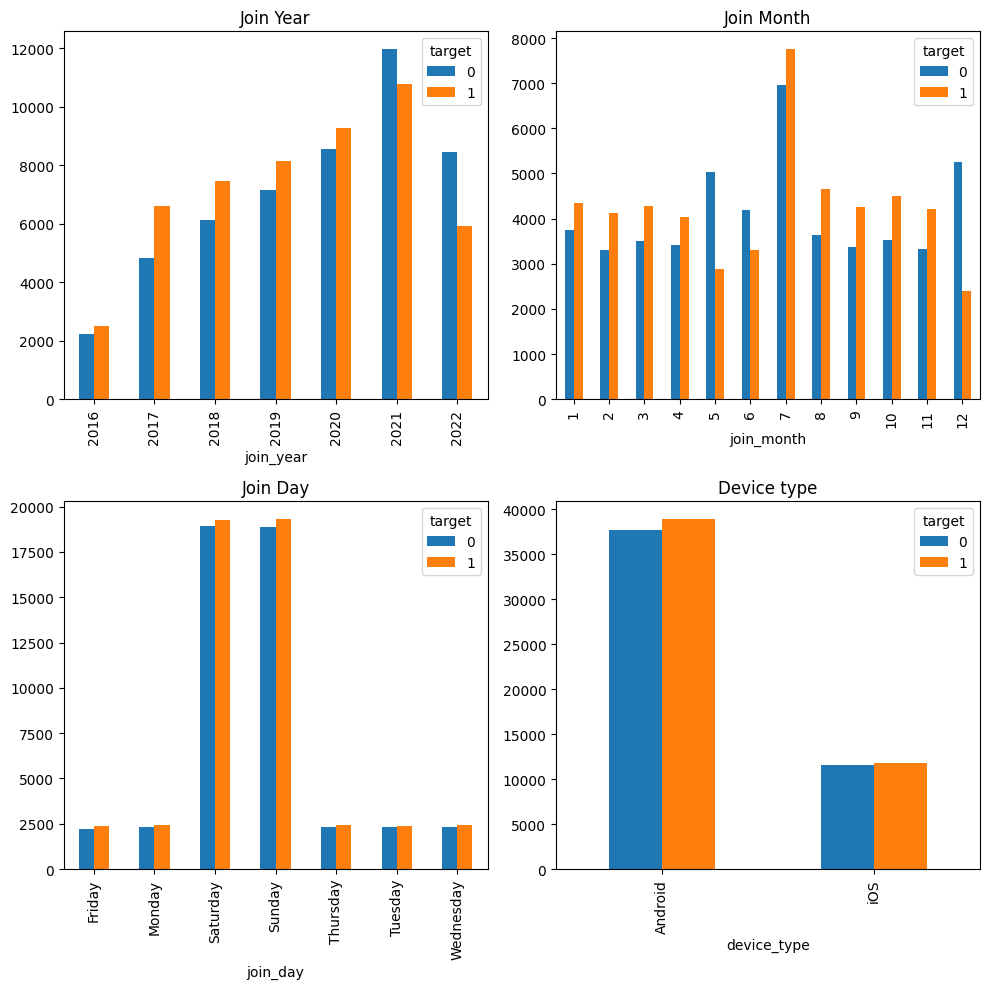

In [133]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# join_year
crosstab_table = pd.crosstab(df['join_year'], df['target'])
crosstab_table.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Join Year')



# join_month
crosstab_table = pd.crosstab(df['join_month'], df['target'])
crosstab_table.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Join Month')

# join_day
crosstab_table = pd.crosstab(df['join_day'], df['target'])
crosstab_table.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Join Day')

# gender
crosstab_table = pd.crosstab(df['device_type'], df['target'])
crosstab_table.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Device type')

plt.tight_layout()

plt.show()

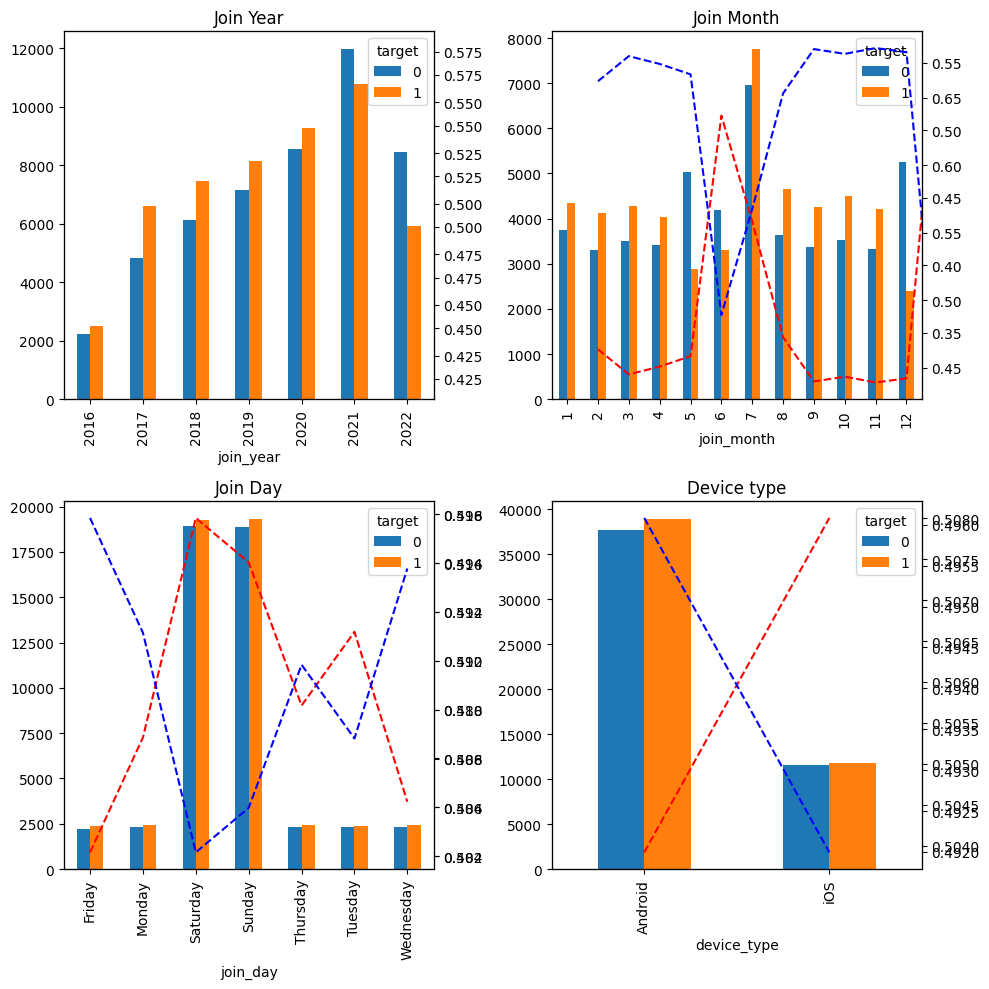

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# join_year
crosstab_table = pd.crosstab(df['join_year'], df['target'])
ax = crosstab_table.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Join Year')

# target 0,1의 비율 계산
total = crosstab_table.sum(axis=1)
prop_0 = crosstab_table[0] / total
prop_1 = crosstab_table[1] / total

# 비율 선 그래프 추가
prop_0.plot(ax=ax.twinx(), color='red', linestyle='--')
prop_1.plot(ax=ax.twinx(), color='blue', linestyle='--')

# join_month
crosstab_table = pd.crosstab(df['join_month'], df['target'])
ax = crosstab_table.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Join Month')

# target 0,1의 비율 계산
total = crosstab_table.sum(axis=1)
prop_0 = crosstab_table[0] / total
prop_1 = crosstab_table[1] / total

# 비율 선 그래프 추가
prop_0.plot(ax=ax.twinx(), color='red', linestyle='--')
prop_1.plot(ax=ax.twinx(), color='blue', linestyle='--')

# join_day
crosstab_table = pd.crosstab(df['join_day'], df['target'])
ax = crosstab_table.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Join Day')

# target 0,1의 비율 계산
total = crosstab_table.sum(axis=1)
prop_0 = crosstab_table[0] / total
prop_1 = crosstab_table[1] / total

# 비율 선 그래프 추가
prop_0.plot(ax=ax.twinx(), color='red', linestyle='--')
prop_1.plot(ax=ax.twinx(), color='blue', linestyle='--')

# gender
crosstab_table = pd.crosstab(df['device_type'], df['target'])
ax = crosstab_table.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Device type')

# target 0,1의 비율 계산
total = crosstab_table.sum(axis=1)
prop_0 = crosstab_table[0] / total
prop_1 = crosstab_table[1] / total

# 비율 선 그래프 추가
prop_0.plot(ax=ax.twinx(), color='red', linestyle='--')
prop_1.plot(ax=ax.twinx(), color='blue', linestyle='--')

plt.tight_layout()

plt.show()